## Backpropagation Exercise
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

In [2]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

shape of x_mat_full is (500, 3)
shape of y is (500,)


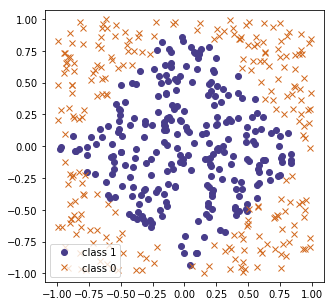

In [3]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
# y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
#y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
#y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
#y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue') # red 0
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')     # blue x 
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

In [4]:
x_mat_full[y==1, 0]

array([-3.60201407e-02,  2.63964614e-01,  4.87511901e-01,  7.69642947e-01,
        2.07553107e-01, -2.62321932e-01, -5.74374846e-01,  5.86023024e-01,
       -5.59185889e-02, -4.16333563e-01,  2.84363433e-01,  4.87962708e-01,
       -3.11190754e-01, -1.33309372e-01, -2.20926099e-01,  1.56327541e-01,
        8.35912567e-01, -1.05403170e-01,  8.13585697e-01,  7.51493830e-01,
        6.67940013e-01,  2.06198138e-01,  4.23897394e-02,  6.84164754e-01,
       -1.42419809e-01, -1.46692566e-01, -6.06287433e-02,  2.01383764e-01,
       -7.35880312e-01, -2.10076175e-01,  5.69791112e-01, -5.72942321e-01,
        6.30045573e-01,  4.47283205e-01,  4.87623091e-01,  8.34497354e-01,
        9.33990248e-02, -7.93589030e-02, -2.38131348e-01,  4.28545830e-01,
       -1.73685684e-01,  1.85361890e-01,  6.03622365e-01,  9.75324167e-02,
        1.14718198e-02, -2.53617776e-01, -4.66024082e-01,  2.58890578e-01,
       -2.51884735e-01, -5.80914048e-02,  1.08930797e-01,  1.34129171e-01,
        5.05658393e-01, -

In [5]:
y

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

Here are some helper functions

In [6]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    #Log loss, also called logistic regression loss or cross-entropy loss, is defined on probability estimates. It is
    #commonly used in (multinomial) logistic regression and neural networks, as well as in some variants of expectation-maximization,
    #and can be used to evaluate the probability outputs (predict_proba) of a classifier instead of its discrete predictions.
        
    
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)                #  activation function
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred                            # derivative of quadratic lost function
    J_W_2_grad = np.dot(J_z_3_grad, a_2)                # derivative of linear activation (regression)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))        # derivative of linear transformation
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations total')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Complete the pseudocode below

In [7]:
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#y = le.fit_transform(y)

iteration 0 , log loss is0.8110, accuracy is0.518
iteration 200 , log loss is0.6882, accuracy is0.596
iteration 400 , log loss is0.6795, accuracy is0.584
iteration 600 , log loss is0.6472, accuracy is0.696
iteration 800 , log loss is0.5657, accuracy is0.77
iteration 1000 , log loss is0.5014, accuracy is0.776
iteration 1200 , log loss is0.4647, accuracy is0.782
iteration 1400 , log loss is0.3997, accuracy is0.866
iteration 1600 , log loss is0.3296, accuracy is0.916
iteration 1800 , log loss is0.2892, accuracy is0.91
iteration 2000 , log loss is0.2643, accuracy is0.912
iteration 2200 , log loss is0.2432, accuracy is0.924
iteration 2400 , log loss is0.2229, accuracy is0.932
iteration 2600 , log loss is0.2041, accuracy is0.938
iteration 2800 , log loss is0.1885, accuracy is0.946
iteration 3000 , log loss is0.1761, accuracy is0.956
iteration 3200 , log loss is0.1661, accuracy is0.966
iteration 3400 , log loss is0.1580, accuracy is0.974
iteration 3600 , log loss is0.1514, accuracy is0.976
it

/Users/MAHDI/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


iteration 4400 , log loss is0.1332, accuracy is0.984
iteration 4600 , log loss is0.1300, accuracy is0.986
iteration 4800 , log loss is0.1272, accuracy is0.986


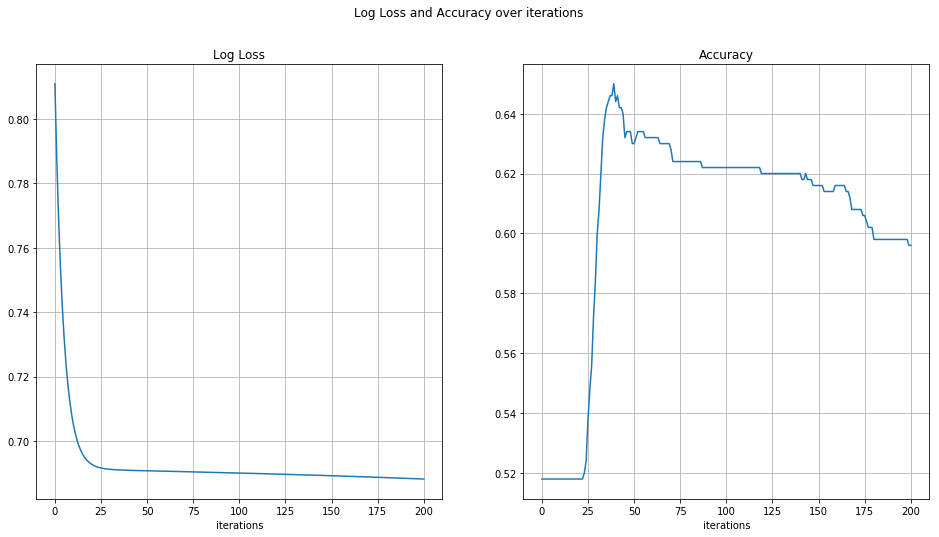

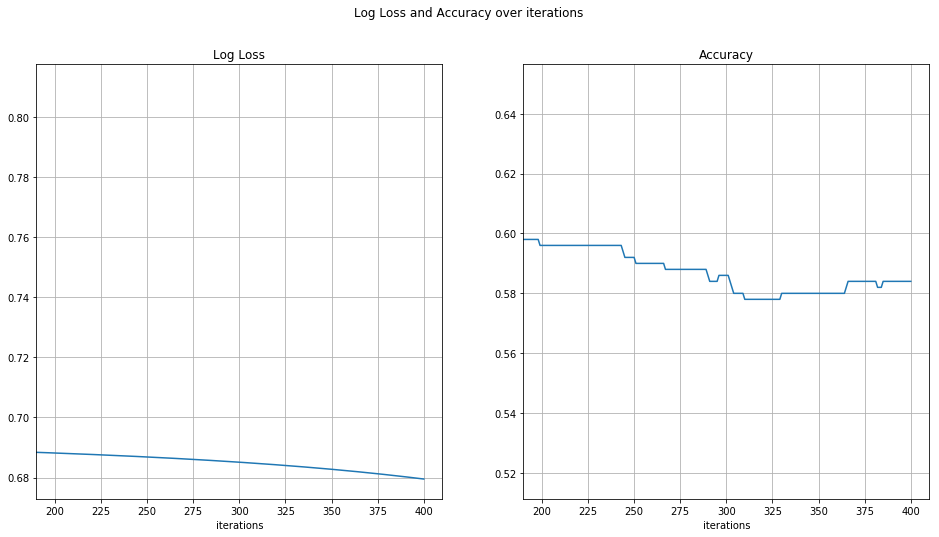

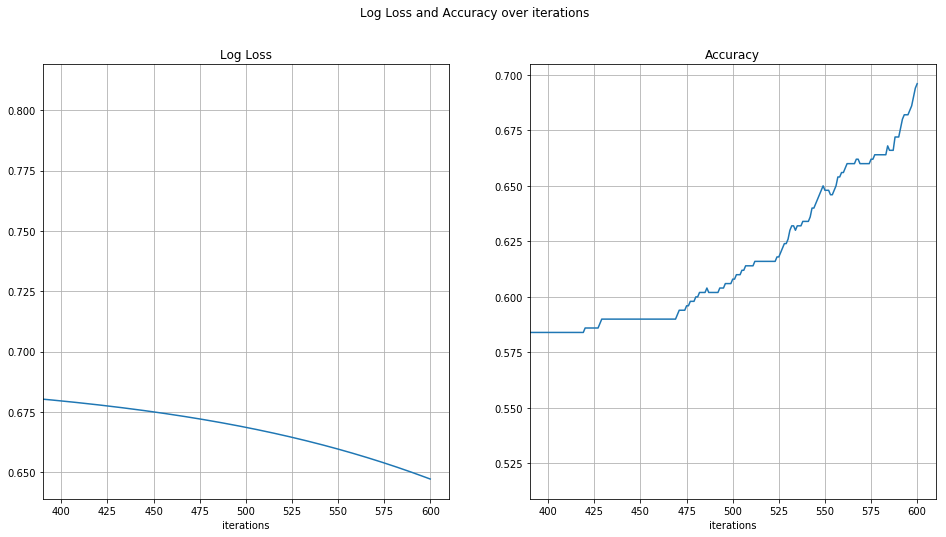

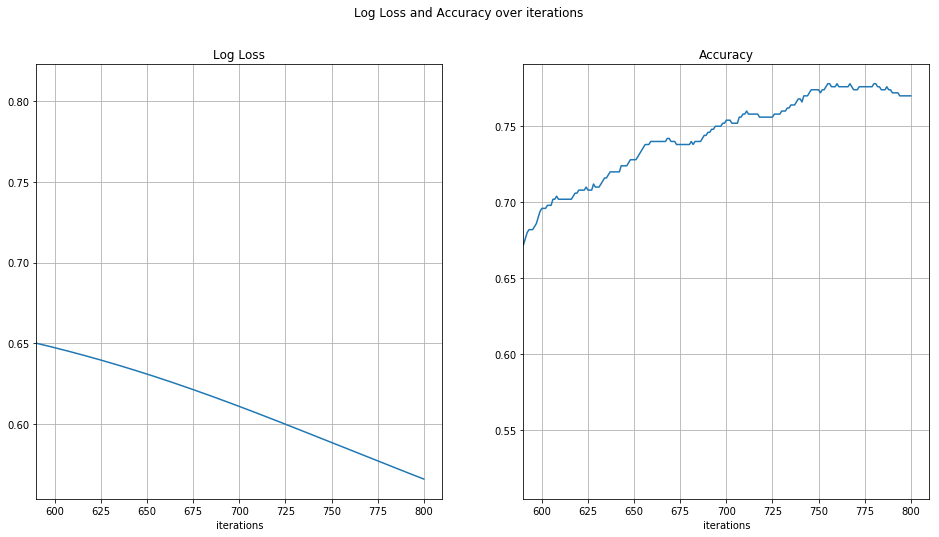

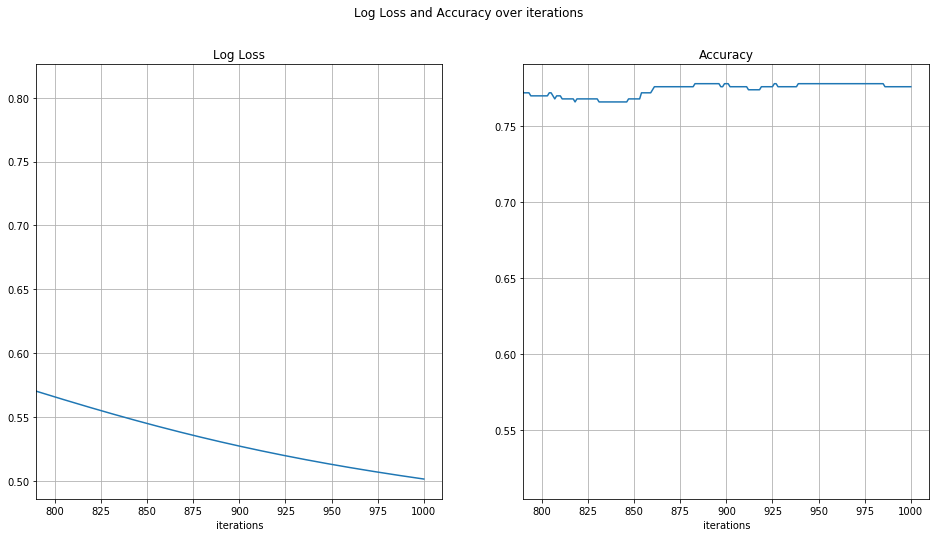

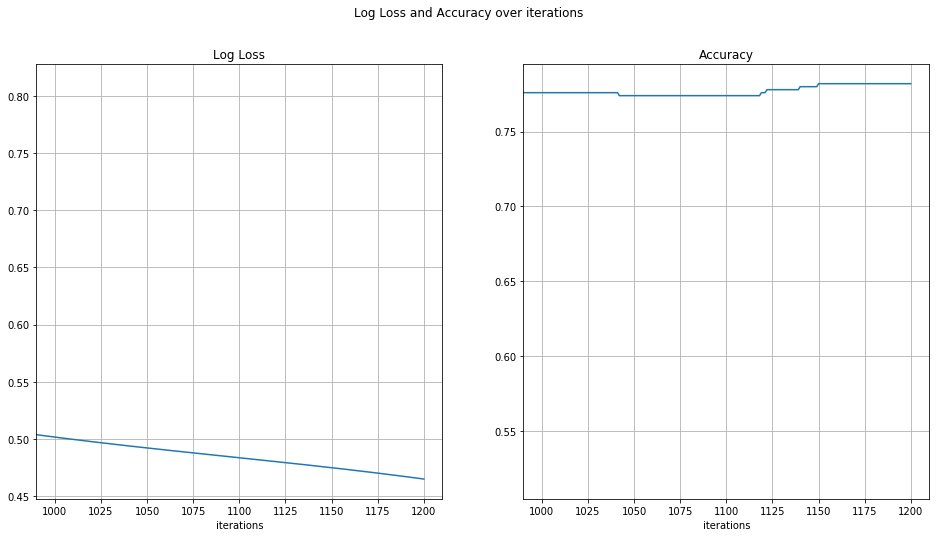

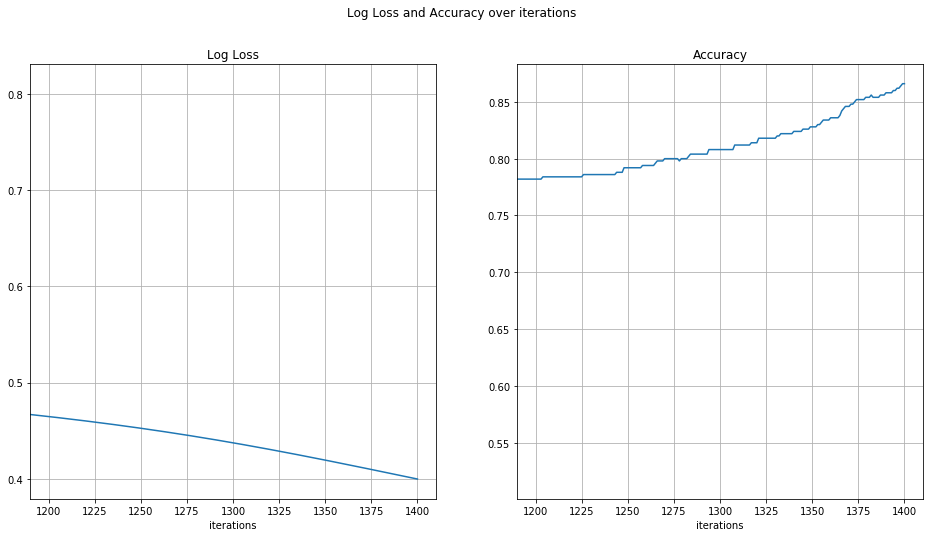

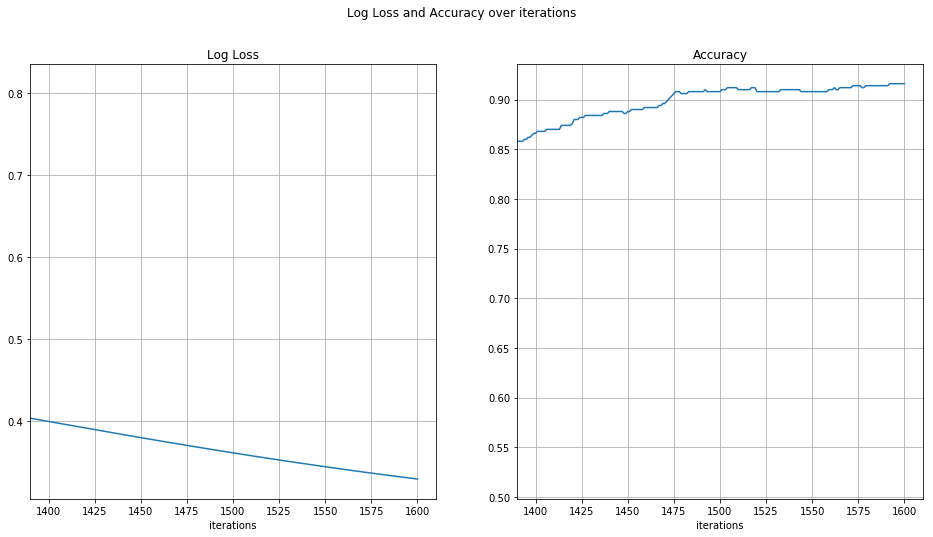

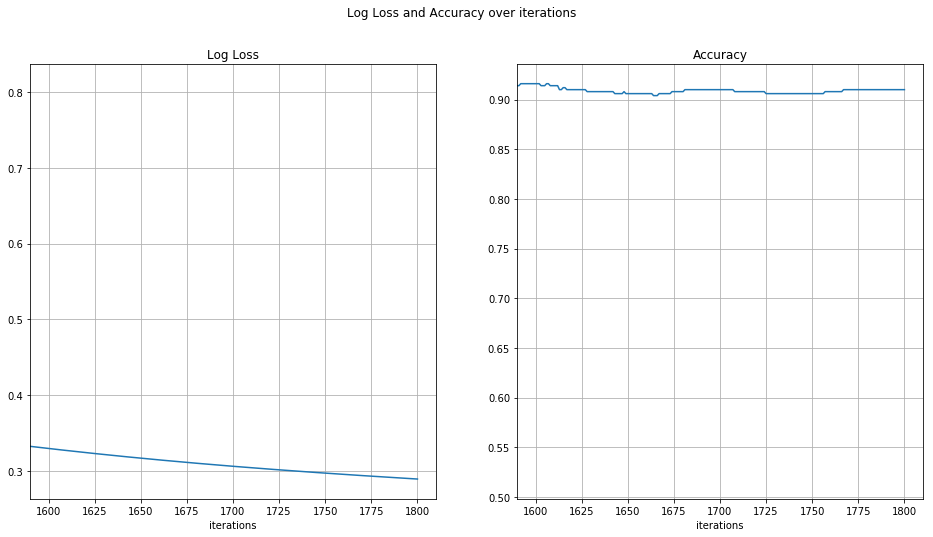

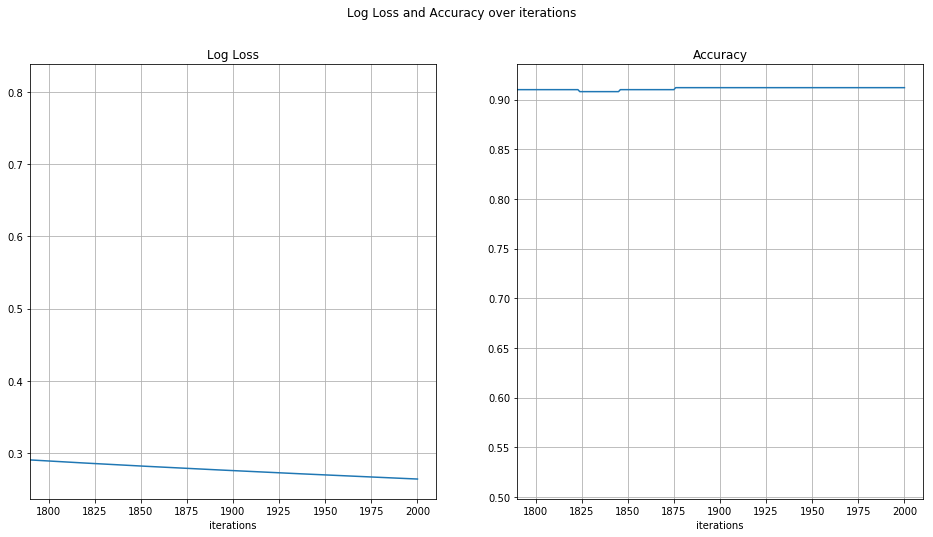

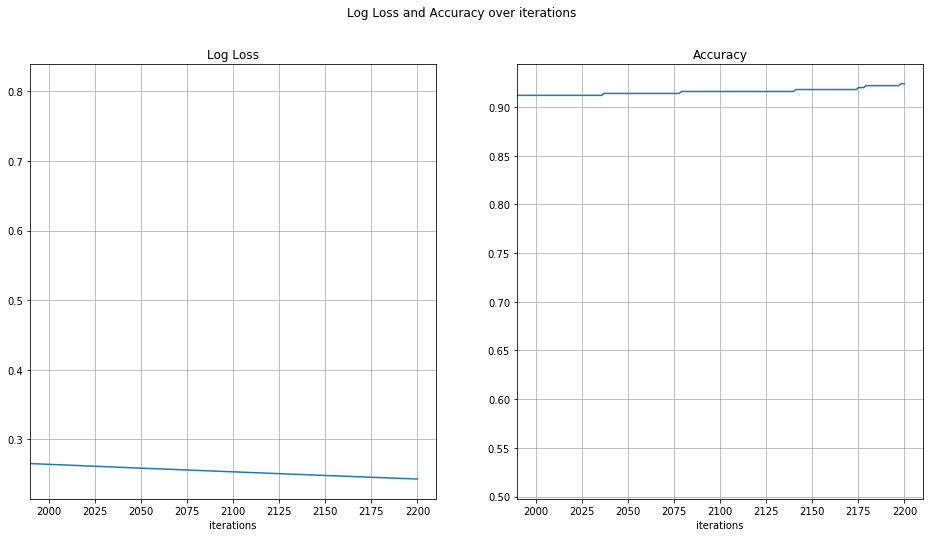

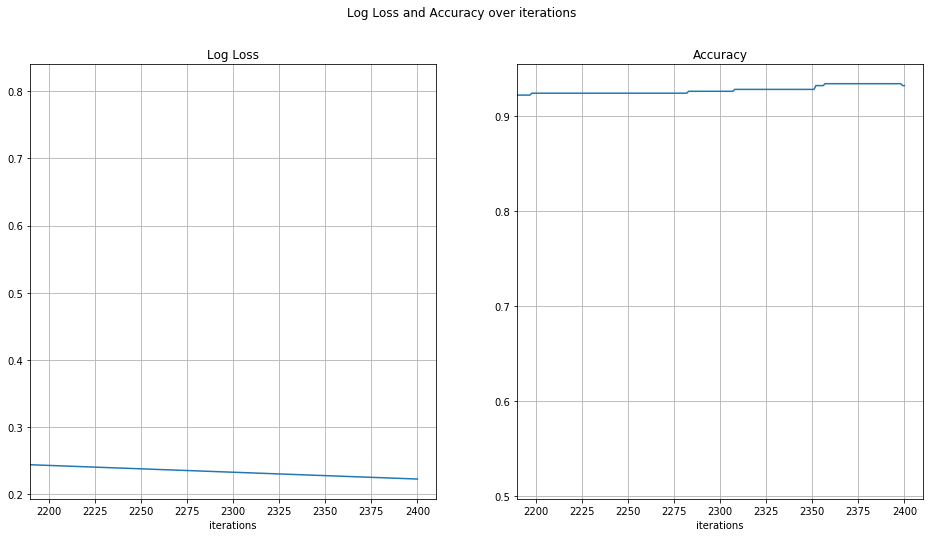

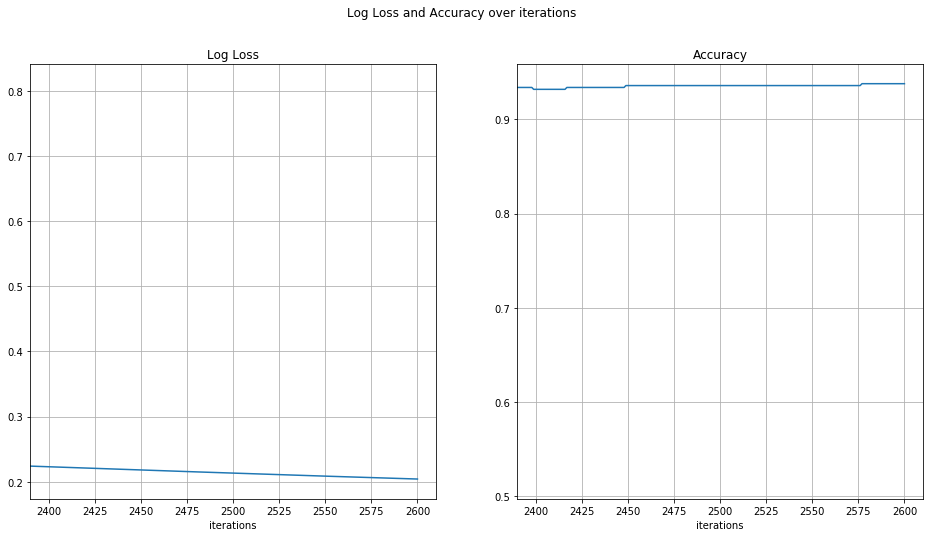

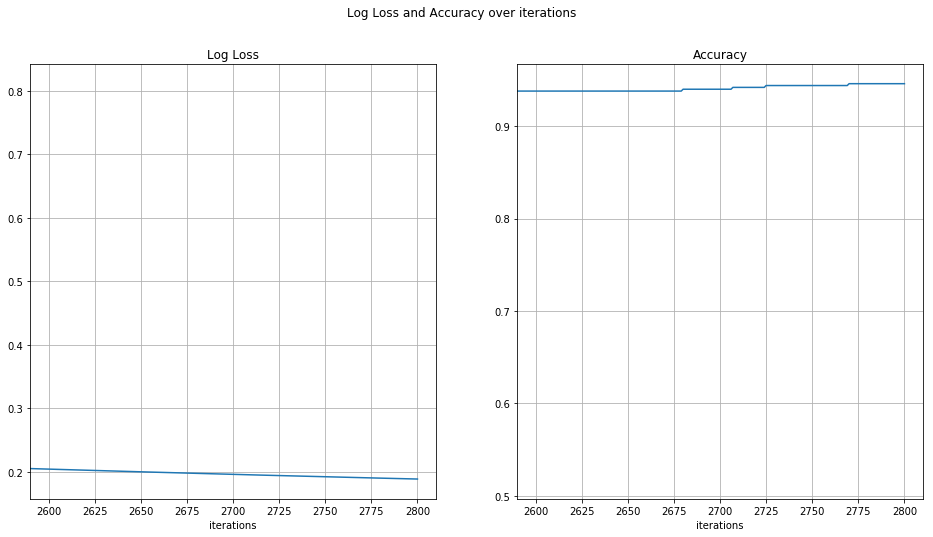

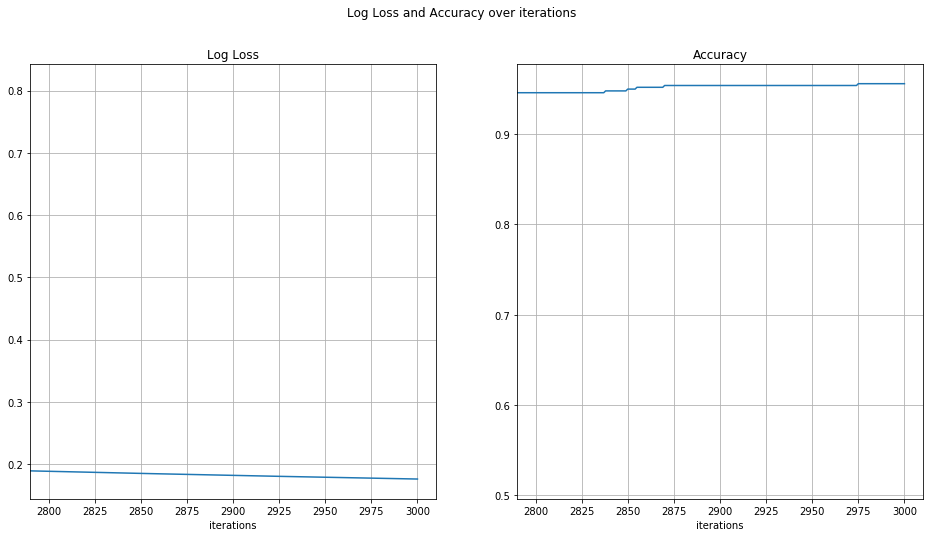

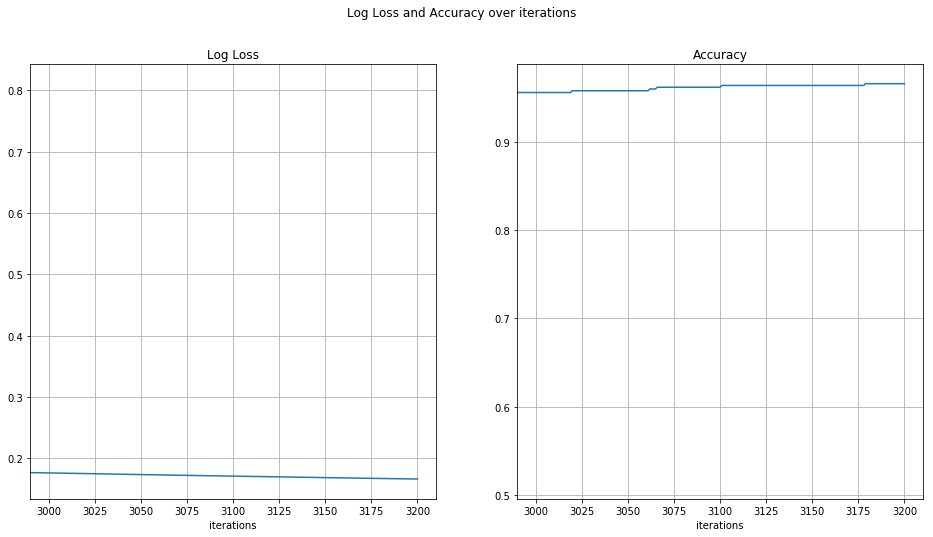

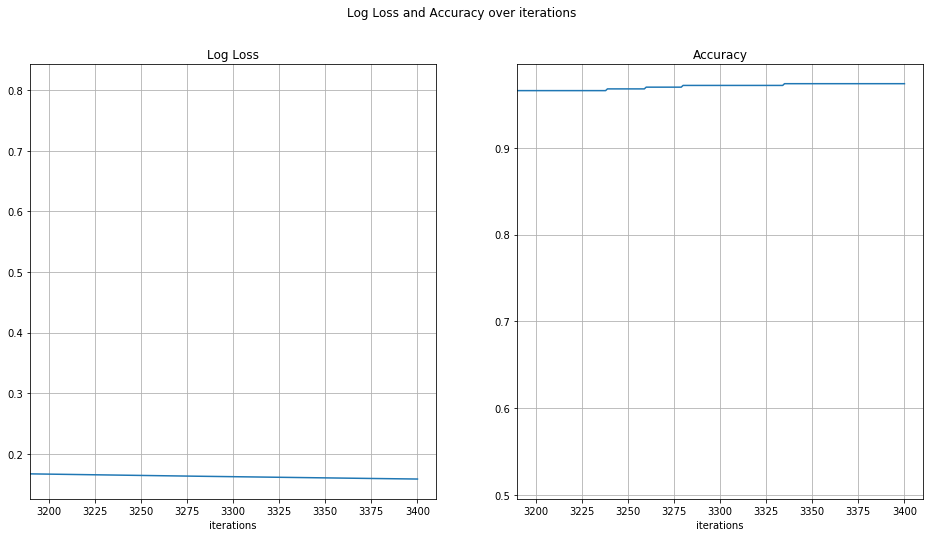

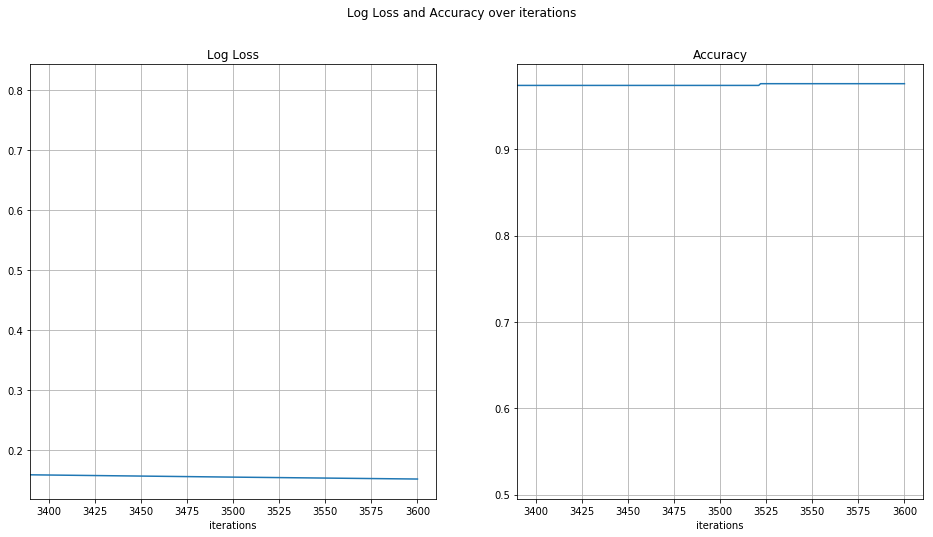

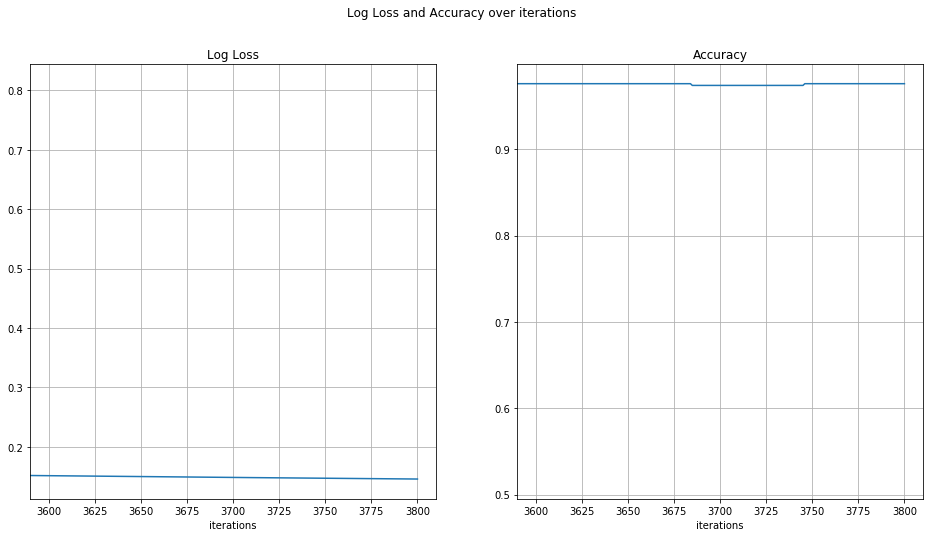

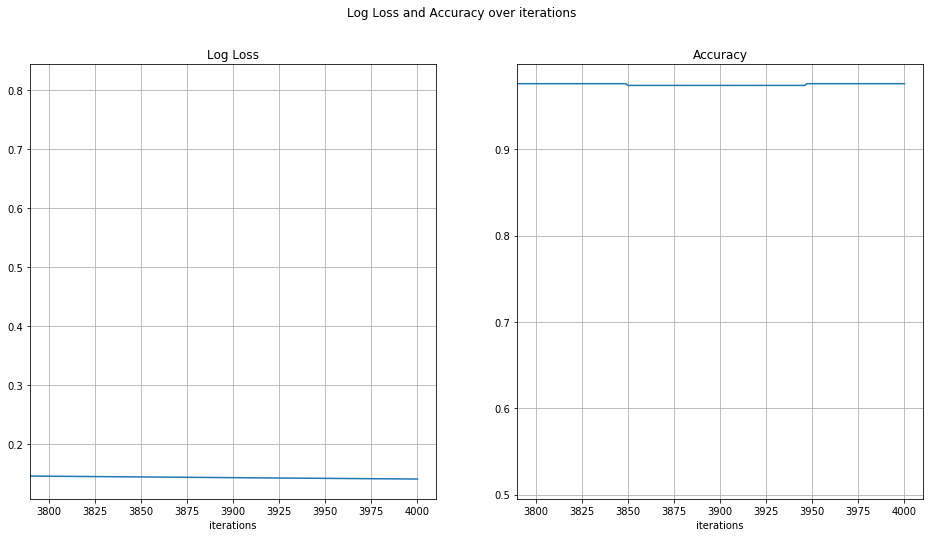

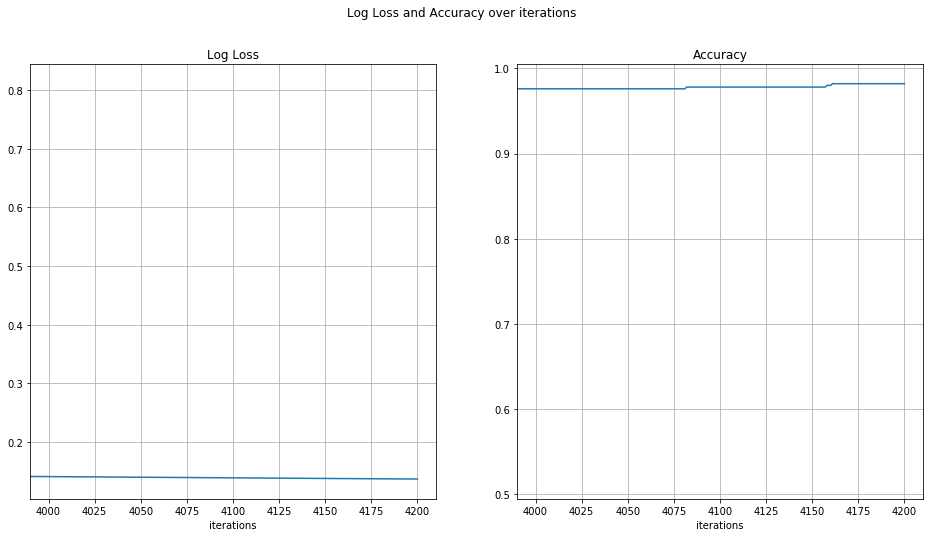

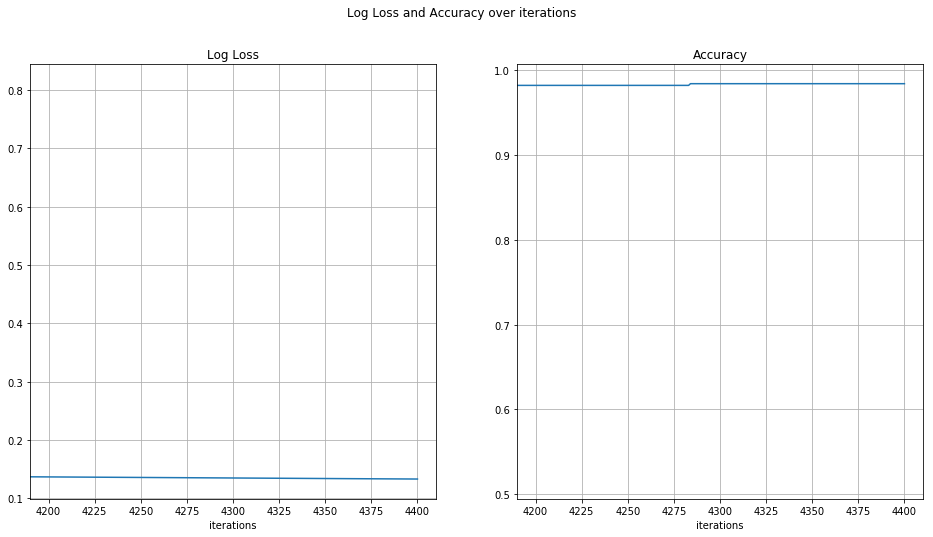

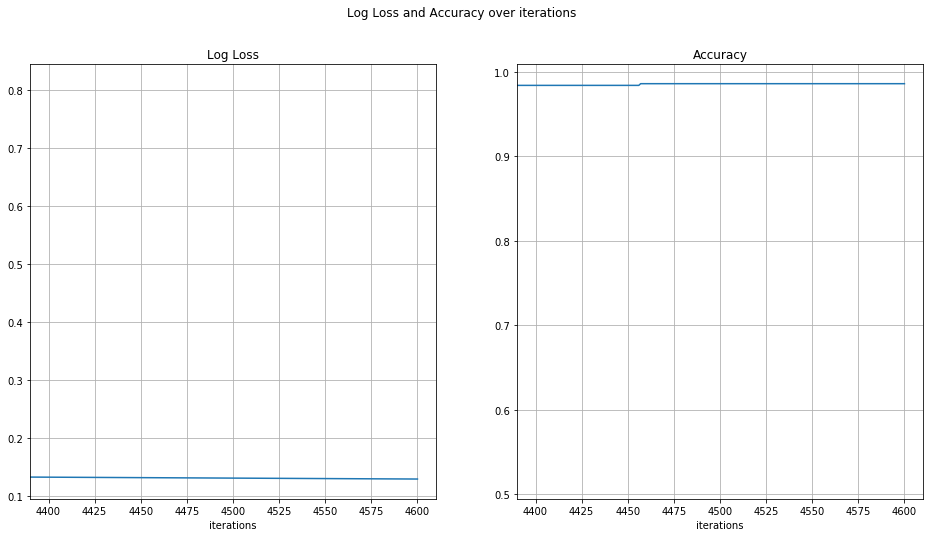

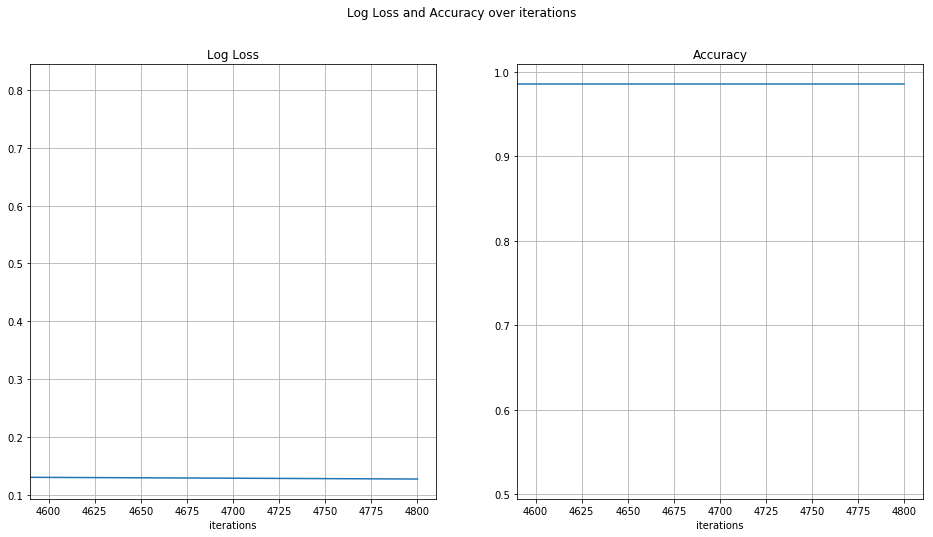

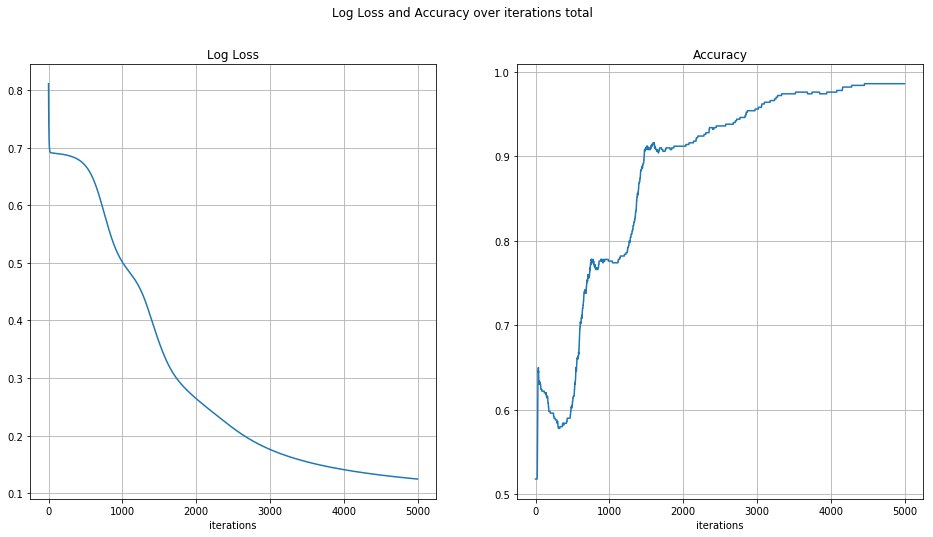

In [11]:
#### Initialize the network parameters
from sklearn.metrics import accuracy_score


np.random.seed(1241)
B = []

def plot_loss_accuracy2(loss_vals, accuracies,k):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    ax.set(xlim=(k-210, k+10))
           
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');
    ax.set(xlim=(k-210, k+10))


W_1 = np.random.uniform(1,-1,size = (3,4))
W_2 = np.random.uniform(1,-1,size = (4))     # we should consider the size of W_2, W_1 as : (num1,num2) , (num2,1)
num_iter = 5000
learning_rate = 0.001    # step size
x_mat = x_mat_full

A = [j for j in range(200, num_iter,200)]


loss_vals , accuracies = [] , []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    
    #y_pred, gradient = forward_pass(W_1, W_2)
    y_pred , (J_W_1_grad, J_W_2_grad)= forward_pass(W_1, W_2)
    ## Update the weight matrices
    
    #W_1 = W_1 - learning_rate*gradient[0]
    W_1 = W_1 - learning_rate*J_W_1_grad
    #W_2 = W_2 - learning_rate*gradient[1]
    W_2 = W_2 - learning_rate*J_W_2_grad

    ### Compute the loss and accuracy
    loss_val = loss_fn(y, y_pred, eps=1e-16)
    loss_vals.append(loss_val)

    #accuracy = accuracy_score(y, y_pred.round())  
    #accuracies.append(accuracy)
    acc = np.sum((y_pred>=0.5) ==y)/num_obs
    accuracies.append(acc)
    
    # we need to have y_pred as class (binary) ::> 
    ## Print the loss and accuracy for every 200th iteration
    if((i%200)==0):
        print('iteration {} , log loss is{:0.4f}, accuracy is{}'.format(i,loss_val,acc))
        
    
    if i in A:
        plot_loss_accuracy2(loss_vals, accuracies,i)
        
plot_loss_accuracy(loss_vals, accuracies)


In [9]:
#### Plot the predicted answers with mistakes in yellow

In [15]:
pred0 = y_pred < 0.5
pred1 = y_pred >= 0.5

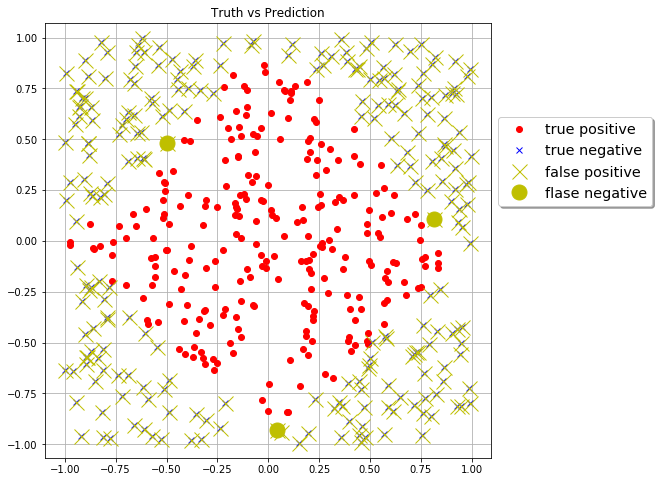

In [18]:
fig, ax = plt.subplots(figsize =(8,8))

#true prediction
ax.plot(x_mat[pred1 & y==1 , 0],x_mat[pred1 & y==1 , 1], 'ro', label='true positive')              # red 0
ax.plot(x_mat[pred1 & y==0 , 0],x_mat[pred1 & y==0 , 1], 'bx', label='true negative')              # red 0

# false prediction

ax.plot(x_mat[pred1 & y==0 , 0],x_mat[pred1 & y==0 , 1], 'yx', label='false positive',markersize = 15)              # red 0
ax.plot(x_mat[pred0 & y==1 , 0],x_mat[pred0 & y==1 , 1], 'yo', label='flase negative',markersize = 15)              # red 0


ax.set(title = 'Truth vs Prediction')
ax.grid(True)
ax.legend(bbox_to_anchor = (1,0.8) ,fancybox = True, shadow = True, fontsize = 'x-large')
ax.axis('equal');


In [19]:
y_pred.round().shape

(500,)

In [20]:
y.shape

(500,)

In [21]:
accuracies

[0.518,
 0.518,
 0.518,
 0.518,
 0.518,
 0.518,
 0.518,
 0.518,
 0.518,
 0.518,
 0.518,
 0.518,
 0.518,
 0.518,
 0.518,
 0.518,
 0.518,
 0.518,
 0.518,
 0.518,
 0.518,
 0.518,
 0.518,
 0.52,
 0.524,
 0.538,
 0.548,
 0.556,
 0.572,
 0.584,
 0.6,
 0.608,
 0.62,
 0.632,
 0.638,
 0.642,
 0.644,
 0.646,
 0.646,
 0.65,
 0.644,
 0.646,
 0.642,
 0.642,
 0.64,
 0.632,
 0.634,
 0.634,
 0.634,
 0.63,
 0.63,
 0.632,
 0.634,
 0.634,
 0.634,
 0.634,
 0.632,
 0.632,
 0.632,
 0.632,
 0.632,
 0.632,
 0.632,
 0.632,
 0.63,
 0.63,
 0.63,
 0.63,
 0.63,
 0.63,
 0.628,
 0.624,
 0.624,
 0.624,
 0.624,
 0.624,
 0.624,
 0.624,
 0.624,
 0.624,
 0.624,
 0.624,
 0.624,
 0.624,
 0.624,
 0.624,
 0.624,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.622,
 0.62,
 0.62,
 0.62,
 0.62,
 0.62,
 0.62,
 0.62,
 0.62,
 0.62,